In [1]:
try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle
import os
import pandas as pd
import seaborn as sns
cur_path = 'summaries.p'


In [2]:
with open(cur_path, 'rb') as fp:
    data = pickle.load(fp)
if 'condition' in data:
	del data['condition']
for i in data.keys():
	if i=='condition':
		continue
	print(i,len(data[i]))
# del data['condition']
df = pd.DataFrame.from_dict(data, orient='columns')
df

auc_1 690
auc_forget 690
index 690
id 690
accuracy_1 690
tag 690
hidden_size 690
accuracy_2 690
steps_1 690
batch_size 690
steps_2 690
accuracy_forget 690
auc_2 690


,auc_1,auc_forget,index,id,accuracy_1,tag,hidden_size,accuracy_2,steps_1,batch_size,steps_2,accuracy_forget,auc_2
0,0.999988,0.614442,0,original,0.99818,None,100,0.99725,12860,NaN,11132,0.70207,0.999956
1,0.999943,0.353573,0,heterogeneous_constant,0.99829,None,100,0.99778,12261,NaN,7923,0.50157,0.999976
2,0.999967,0.599207,0,heterogeneous_dynamic_weights_relu6,0.99752,None,100,0.99611,11926,NaN,9940,0.69930,0.999897
3,0.999935,0.611447,0,original,0.99796,None,100,0.99555,10950,NaN,10674,0.67092,0.999882
4,0.999963,0.337708,0,heterogeneous_constant,0.99732,None,100,0.99501,9915,NaN,11383,0.49717,0.999833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.999903,0.596745,0,heterogeneous_constant,0.99663,gamma_immidiate_reponse,100,0.99780,11718,10.0,6298,0.62307,0.999929
686,0.999917,0.616602,0,heterogeneous_dynamic_weights_relu6,0.99693,gamma_immidiate_reponse,100,0.99806,12490,10.0,11172,0.63772,0.999975
687,0.999990,0.609163,0,original,0.99859,gamma_immidiate_reponse,100,0.99525,10228,10.0,8020,0.71635,0.999835
688,0.999982,0.620110,0,heterogeneous_constant,0.99810,gamma_immidiate_reponse,100,0.99336,10261,10.0,8370,0.73163,0.999833


In [3]:
# def create_id(x):
# 	print(x['tag'])
# 	return
# df = df[df['id'].notna()]
# df['id']=df[['id','tag']].apply(create_id)
def f(*cols):
    return "_".join([str(i) for i in cols])

df['u_id'] = df.apply(lambda x: f(x.id, x.tag,x.batch_size), axis=1)
df

,auc_1,auc_forget,index,id,accuracy_1,tag,hidden_size,accuracy_2,steps_1,batch_size,steps_2,accuracy_forget,auc_2,u_id
0,0.999988,0.614442,0,original,0.99818,None,100,0.99725,12860,NaN,11132,0.70207,0.999956,original_None_nan
1,0.999943,0.353573,0,heterogeneous_constant,0.99829,None,100,0.99778,12261,NaN,7923,0.50157,0.999976,heterogeneous_constant_None_nan
2,0.999967,0.599207,0,heterogeneous_dynamic_weights_relu6,0.99752,None,100,0.99611,11926,NaN,9940,0.69930,0.999897,heterogeneous_dynamic_weights_relu6_None_nan
3,0.999935,0.611447,0,original,0.99796,None,100,0.99555,10950,NaN,10674,0.67092,0.999882,original_None_nan
4,0.999963,0.337708,0,heterogeneous_constant,0.99732,None,100,0.99501,9915,NaN,11383,0.49717,0.999833,heterogeneous_constant_None_nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.999903,0.596745,0,heterogeneous_constant,0.99663,gamma_immidiate_reponse,100,0.99780,11718,10.0,6298,0.62307,0.999929,heterogeneous_constant_gamma_immidiate_reponse...
686,0.999917,0.616602,0,heterogeneous_dynamic_weights_relu6,0.99693,gamma_immidiate_reponse,100,0.99806,12490,10.0,11172,0.63772,0.999975,heterogeneous_dynamic_weights_relu6_gamma_immi...
687,0.999990,0.609163,0,original,0.99859,gamma_immidiate_reponse,100,0.99525,10228,10.0,8020,0.71635,0.999835,original_gamma_immidiate_reponse_10.0
688,0.999982,0.620110,0,heterogeneous_constant,0.99810,gamma_immidiate_reponse,100,0.99336,10261,10.0,8370,0.73163,0.999833,heterogeneous_constant_gamma_immidiate_reponse...


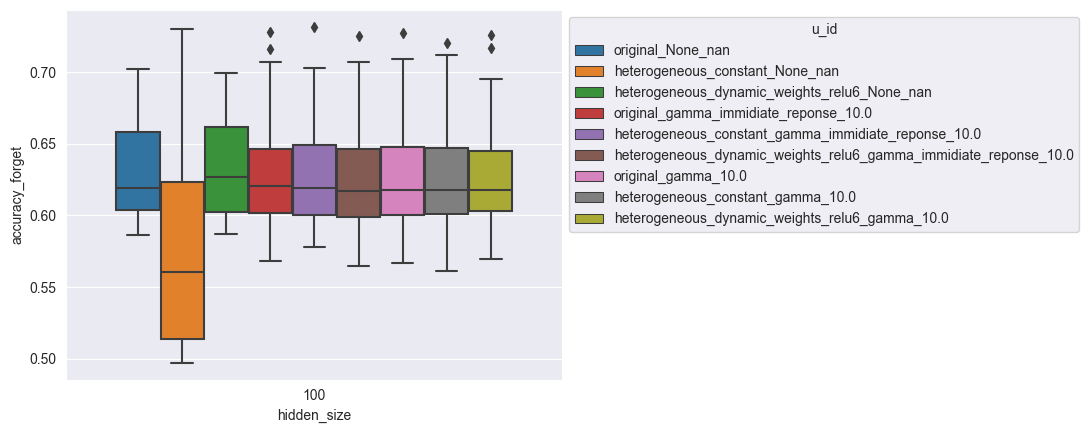

In [4]:

ax = sns.boxplot(df,x='hidden_size',y='accuracy_forget',hue='u_id')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

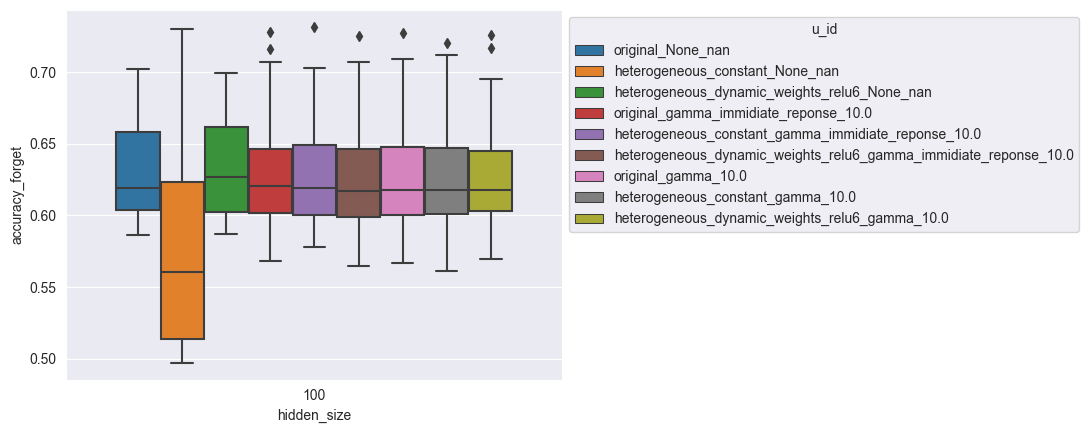

In [8]:
ax = sns.boxplot(df,x='hidden_size',y='accuracy_forget',hue='u_id')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

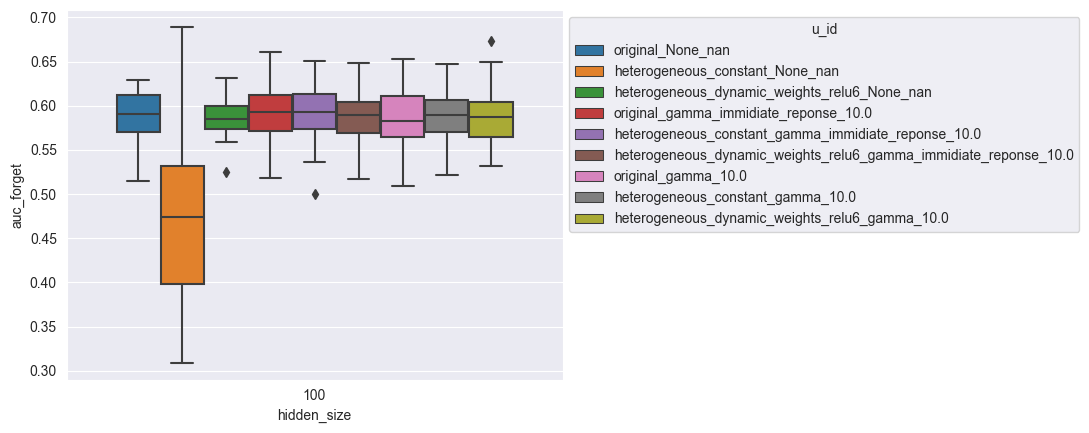

In [9]:
ax =sns.boxplot(df,x='hidden_size',y='auc_forget',hue='u_id')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

<AxesSubplot: xlabel='hidden_size', ylabel='steps_2'>

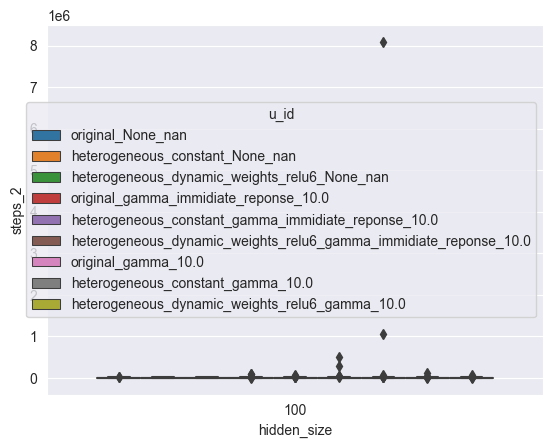

In [7]:
sns.boxplot(df,x='hidden_size',y='steps_2',hue='u_id')